<a href="https://colab.research.google.com/github/properallan/IM458-B/blob/master/kuramotoSivashinsky/kuramotoSivashinsky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [326]:
!apt install subversion
!svn checkout https://github.com/properallan/IM458-B/trunk/kuramotoSivashinsky
%cd ./kuramotoSivashinsky

Reading package lists... Done
Building dependency tree       
Reading state information... Done
subversion is already the newest version (1.9.7-4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
A    kuramotoSivashinsky/0_data_generation.py
A    kuramotoSivashinsky/1_creating_figures.py
A    kuramotoSivashinsky/2_creating_video.py
A    kuramotoSivashinsky/KS.py
A    kuramotoSivashinsky/kuramotoSivashinsky.ipynb
Checked out revision 18.
/content/kuramotoSivashinsky/kuramotoSivashinsky/kuramotoSivashinsky/kuramotoSivashinsky/kuramotoSivashinsky/kuramotoSivashinsky


In [327]:
import KS
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

In [328]:
# define data and initialize simulation
L    = 200/(2*pi)
N    = 512
N    = 128
L    = 16
dt   = 0.25
ninittransients = 10000
tend = 50000 + ninittransients  #50000
tend = 6e4
tend = 150
TL1  = 0.094
dns  = KS.KS(L=L, N=N, dt=dt, tend=tend)


In [329]:
# intial conditions
dns.IC(u0=np.cos(dns.x/16)*(1+np.sin(dns.x/16)))

# simulate initial transient
dns.simulate()
# convert to physical space
dns.fou2real()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'shading'
  


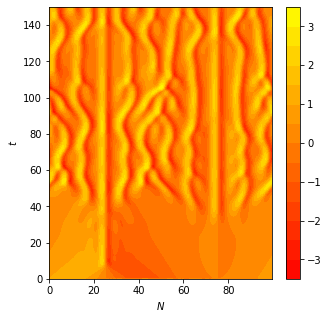

In [330]:
N_plot = 601
N_plot = len(dns.tt)
ninit = int(4e4+1e5)
ninit = 0
u_plot = dns.uu[ninit:ninit+N_plot,:]
t_plot = (dns.tt[ninit:ninit+N_plot] - dns.tt[ninit])*TL1
t_plot = (dns.tt[ninit:ninit+N_plot] - dns.tt[ninit])
# Plotting the contour plot
fig = plt.subplots(figsize=(5,5))
t, s = np.meshgrid(t_plot, np.array(range(N))+1)
t, s = np.meshgrid(t_plot, dns.x)
#t, s = np.meshgrid(np.arange(N_plot), np.array(range(N))+1)
#plt.contourf(s, t, np.transpose(u_plot), 15, cmap=plt.get_cmap("seismic"), vmin=-3,vmax=3)
plt.contourf(s, t, np.transpose(u_plot), 15, cmap=plt.get_cmap("autumn"),shading='auto')
plt.colorbar()
#plt.ylim([0,10])
#plt.xlim([0,512])

plt.xlabel(r"$N$")
plt.ylabel(r"$t$")
plt.show()


In [331]:
dns.x/2/pi

array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
        1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
        2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
        3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
        4.   ,  4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,
        5.   ,  5.125,  5.25 ,  5.375,  5.5  ,  5.625,  5.75 ,  5.875,
        6.   ,  6.125,  6.25 ,  6.375,  6.5  ,  6.625,  6.75 ,  6.875,
        7.   ,  7.125,  7.25 ,  7.375,  7.5  ,  7.625,  7.75 ,  7.875,
        8.   ,  8.125,  8.25 ,  8.375,  8.5  ,  8.625,  8.75 ,  8.875,
        9.   ,  9.125,  9.25 ,  9.375,  9.5  ,  9.625,  9.75 ,  9.875,
       10.   , 10.125, 10.25 , 10.375, 10.5  , 10.625, 10.75 , 10.875,
       11.   , 11.125, 11.25 , 11.375, 11.5  , 11.625, 11.75 , 11.875,
       12.   , 12.125, 12.25 , 12.375, 12.5  , 12.625, 12.75 , 12.875,
       13.   , 13.125, 13.25 , 13.375, 13.5  , 13.625, 13.75 , 13.875,
      

In [319]:
dns.N

128